# Boost Online Reach

url : URL of the webpage to be classified

webpageDescription : One line description of the webpage

alchemy_category : Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)

alchemy_category_score : Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)

avgLinkWordLength : Average number of words in a webpage

AvglinkWithOneCommonWord : Average number of web pages sharing at least one word with one other web page

AvglinkWithTwoCommonWord : Average number of web pages sharing at least one word with two other web pages

AvglinkWithThreeCommonWord : Average number of web pages sharing at least one word with three other web pages

AvglinkWithFourCommonWord : Average number of web pages sharing at least one word with four other web pages

redundancyMeasure : Measure of redundancy computed by finding the compression achieved on this web page via gzip

embedRatio : Count of tags

frameBased : Binary indication of whether a webpage has frameset markup

frameTagRatio : Ratio of frameset markups over total markups

domainLink: Binary indication of whether the webpage contains in URL with domain

tagRatio : Ratio of tags over text in the webpage

imageTagRatio : Ratio of tags over text in the webpage

isNews : Binary indication of whether a webpage is a news article

lengthyDomain : Binary indication of whether webpage's text contains
more than 30 alpha-numeric characters

hyperlinkToAllWordsRatio : Percentage of words on the webpage that are also in the hyperlink text

isFrontPageNews : Binary indication of whether webpage is front-page news

alphanumCharCount : Number of alpha-numeric characters in webpage's text

linksCount : Number of markups

wordCount : Number of words in URL

parametrizedLinkRatio :
spellingErrorsRatio : Ration of words that contain spelling errors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [2]:
df = pd.read_csv("train_data.csv")
print(df.shape)
df.head(5)


(5916, 27)


,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",?,?,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",?,?,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1,4321


#        EDA                

<AxesSubplot:>

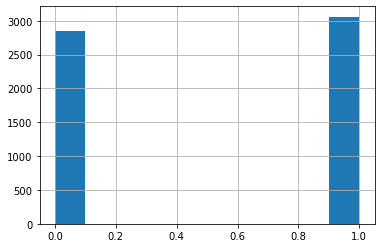

In [3]:
#distribution of output class
df["label"].hist()

In [4]:
#no nan values
print(df.isna().sum())
print("DataFrame shape : ", df.shape)

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
label                         0
id                            0
dtype: int64
DataFrame shape :  (5916, 27)


In [5]:
df['alchemy_category'].value_counts()

?                     1883
recreation            1014
arts_entertainment     726
business               712
health                 392
sports                 302
culture_politics       268
computer_internet      241
science_technology     230
gaming                  60
religion                56
law_crime               24
unknown                  5
weather                  3
Name: alchemy_category, dtype: int64

In [6]:
len(df[df['alchemy_category'] == '?'])

1883

In [7]:
len(df[df['alchemy_category_score'] == '?'])

1883

In [8]:
#df['webpageDescription'].value_counts()

In [9]:
df.columns

Index(['url', 'webpageDescription', 'alchemy_category',
       'alchemy_category_score', 'avgLinkWordLength',
       'AvglinkWithOneCommonWord', 'AvglinkWithTwoCommonWord',
       'AvglinkWithThreeCommonWord', 'AvglinkWithFourCommonWord',
       'redundancyMeasure', 'embedRatio', 'framebased', 'frameTagRatio',
       'domainLink', 'tagRatio', 'imageTagRatio', 'isNews', 'lengthyDomain',
       'hyperlinkToAllWordsRatio', 'isFrontPageNews', 'alphanumCharCount',
       'linksCount', 'wordCount', 'parametrizedLinkRatio',
       'spellingErrorsRatio', 'label', 'id'],
      dtype='object')

In [10]:
print(len(df[df['avgLinkWordLength'] == '?']))
print(len(df[df['AvglinkWithOneCommonWord'] == '?']))
print(len(df[df['AvglinkWithTwoCommonWord'] == '?']))
print(len(df[df['AvglinkWithThreeCommonWord'] == '?']))
print(len(df[df['AvglinkWithFourCommonWord'] == '?']))
print(len(df[df['redundancyMeasure'] == '?']))
print(len(df[df['embedRatio'] == '?'])) #contains -1
print(len(df[df['framebased'] == '?'])) #only 0s
print(len(df[df['frameTagRatio'] == '?'])) 
print(len(df[df['domainLink'] == '?'])) 




0
0
0
0
0
0
0
0
0
0


In [11]:
len(df[df['embedRatio'] == -1]) ##contains -1 in ratio

638

<AxesSubplot:>

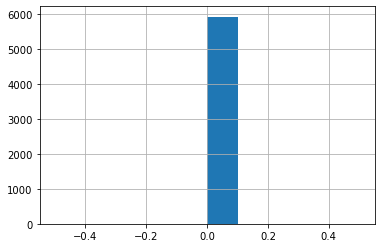

In [12]:
df['framebased'].hist()

<AxesSubplot:>

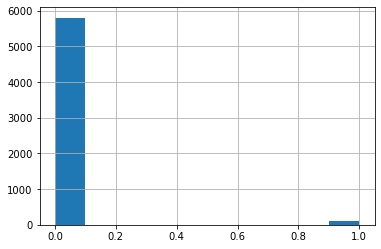

In [13]:
df['domainLink'].hist()

<AxesSubplot:>

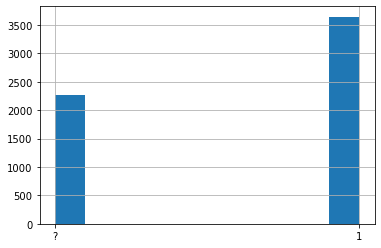

In [14]:
df['isNews'].hist()

<AxesSubplot:>

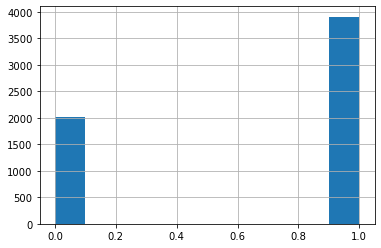

In [15]:
df['lengthyDomain'].hist()

<AxesSubplot:>

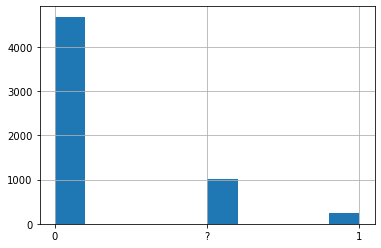

In [16]:
df['isFrontPageNews'].hist()

In [17]:
#front page news doesn't imply label is 1
df_x = df[df['isFrontPageNews'] == '1']
df_x['isFrontPageNews'].value_counts()
print(df_x['label'].value_counts())

0    126
1    107
Name: label, dtype: int64


In [18]:
df['alphanumCharCount'].value_counts()

423     21
0       13
101      7
780      7
1595     6
        ..
5355     1
9453     1
5359     1
621      1
2079     1
Name: alphanumCharCount, Length: 4484, dtype: int64

In [19]:
df['alphanumCharCount'].value_counts()

423     21
0       13
101      7
780      7
1595     6
        ..
5355     1
9453     1
5359     1
621      1
2079     1
Name: alphanumCharCount, Length: 4484, dtype: int64

In [20]:
len(df[df['spellingErrorsRatio'] > 0.9]) 
#more error rate

14

In [21]:
df['imageTagRatio'].value_counts() #contains -1

-1.000000    571
 0.724138     30
 0.000000     29
 0.333333     18
 1.000000     15
            ... 
 0.086538      1
 0.167089      1
 0.062670      1
 0.046041      1
 0.014493      1
Name: imageTagRatio, Length: 4449, dtype: int64

In [22]:
df['hyperlinkToAllWordsRatio'].value_counts() #no negtaives

13    166
19    165
16    163
18    152
20    146
     ... 
88      3
98      2
94      2
97      2
96      1
Name: hyperlinkToAllWordsRatio, Length: 101, dtype: int64

In [23]:
len(df[df['parametrizedLinkRatio'] < 0])  #no negatives

0

In [24]:
len(df[df['spellingErrorsRatio'] > 0.5]) #spellings with high error rate

26

# Preprocessing

In [25]:
df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",?,?,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",?,?,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1,4321


In [26]:
train_df = df
test_df = pd.read_csv("test_data.csv")
test_df.shape

(1479, 26)

In [27]:
print("Train : ", train_df.shape)
print("Test : ", test_df.shape)

Train :  (5916, 27)
Test :  (1479, 26)


In [28]:
test_df['label'] = "test"
test_df.shape

(1479, 27)

In [29]:
data = pd.concat([train_df,test_df], ignore_index=True)
print("shape : ", data.shape)
data.head()

shape :  (7395, 27)


,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",?,?,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",?,?,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1,4321


# Work on numerical/categorical data

In [30]:
data.columns

Index(['url', 'webpageDescription', 'alchemy_category',
       'alchemy_category_score', 'avgLinkWordLength',
       'AvglinkWithOneCommonWord', 'AvglinkWithTwoCommonWord',
       'AvglinkWithThreeCommonWord', 'AvglinkWithFourCommonWord',
       'redundancyMeasure', 'embedRatio', 'framebased', 'frameTagRatio',
       'domainLink', 'tagRatio', 'imageTagRatio', 'isNews', 'lengthyDomain',
       'hyperlinkToAllWordsRatio', 'isFrontPageNews', 'alphanumCharCount',
       'linksCount', 'wordCount', 'parametrizedLinkRatio',
       'spellingErrorsRatio', 'label', 'id'],
      dtype='object')

In [31]:
data['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [32]:
data['alchemy_category'].replace(to_replace='?', value = 'other', inplace = True)

In [33]:
data['alchemy_category'].value_counts()

other                 2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [34]:
data['alchemy_category_score'].value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.499763        1
0.362798        1
0.655718        1
0.591099        1
0.764237        1
Name: alchemy_category_score, Length: 4806, dtype: int64

In [35]:
data['alchemy_category_score'].replace('?', None)

0              ?
1              ?
2       0.386685
3       0.475039
4       0.535009
          ...   
7390    0.681418
7391    0.681418
7392    0.943693
7393    0.943693
7394    0.715035
Name: alchemy_category_score, Length: 7395, dtype: object

In [36]:
data.describe()

,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,framebased,frameTagRatio,domainLink,tagRatio,imageTagRatio,lengthyDomain,hyperlinkToAllWordsRatio,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,id
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,3697.000000
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,2134.896953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,1848.500000
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,3697.000000
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,5545.500000
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,7394.000000


In [37]:
mean_list = []
for val in data['alchemy_category_score']:
    if(val != '?'):
        val_float = float(val)
        mean_list.append(val_float)
    
mean = sum(mean_list) / len(mean_list)      
print("Mean : ", mean)
data['alchemy_category_score'].replace('?', mean, inplace = True)
data['alchemy_category_score'].value_counts() ##replaced '?' with mean

Mean :  0.6033343166237881


0.6033343166237881    2342
0.85                    82
0.0784091               40
0.849999                12
0.535009                10
                      ... 
0.362798                 1
0.655718                 1
0.591099                 1
0.638071                 1
0.764237                 1
Name: alchemy_category_score, Length: 4806, dtype: int64

In [38]:
data.head(2)

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.0,0.0,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.0,0.0,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1,7222


In [39]:
#Added 0s in place of '?'
data['isNews'].replace('?', 0, inplace = True)
data['isNews'].value_counts()

1    4552
0    2843
Name: isNews, dtype: int64

In [40]:
mean_list = []
for val in data['embedRatio']:
    if(val != -1):
        val_float = float(val)
        mean_list.append(val_float)
    
mean = sum(mean_list) / len(mean_list)      
print("Mean : ", mean)
# data['alchemy_category_score'].replace('?', mean, inplace = True)
# data['alchemy_category_score'].value_counts() ##replaced '?' with mean

Mean :  0.0010218378611992138


In [41]:
#replaced -1 with mean
data['embedRatio'].replace(-1, mean, inplace = True)
data['embedRatio'].value_counts()

0.000000    6138
0.001022     774
0.027778       6
0.028571       6
0.011364       5
            ... 
0.012618       1
0.001397       1
0.010638       1
0.001311       1
0.005650       1
Name: embedRatio, Length: 366, dtype: int64

In [42]:
mean_list = []
for val in data['imageTagRatio']:
    if(val != -1):
        val_float = float(val)
        mean_list.append(val_float)
    
mean = sum(mean_list) / len(mean_list)      
print("Mean : ", mean)


Mean :  0.4069900568711415


In [43]:
#replaced -1 with mean
data['imageTagRatio'].replace(-1, mean, inplace = True)
data['imageTagRatio'].value_counts()

0.406990    690
0.000000     40
0.724138     35
0.333333     23
0.250000     19
           ... 
0.033573      1
0.262295      1
0.051213      1
0.027972      1
0.014493      1
Name: imageTagRatio, Length: 5418, dtype: int64

Pending Tasks:
high spelling error ratios. 
convert alchemy_cat to encoding

# Work on text data

In [44]:
data.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1,4321


In [45]:
x = data['webpageDescription']
x

0       {"title":"Join Polyvore and follow the latest ...
1       {"body":"Speed Air Man--David Belle david bell...
2       {"title":"Chicken Gruyere Recipe ","body":"Chi...
3       {"title":"Ikan Bilis With Tempeh Groundnuts ",...
4       {"url":"recipes wuzzle org index php 72","titl...
                              ...                        
7390    {"title":" ","body":" ","url":"lanascooking 20...
7391    {"title":"Billy s Chocolate Buttercream Martha...
7392    {"url":"laweekly bestof 2011 award best belly ...
7393    {"title":"Buffalo Chicken Burgers recipe buffa...
7394    {"title":"canarygirl com Sirloin with Pepperco...
Name: webpageDescription, Length: 7395, dtype: object

In [46]:
title=[]
body=[]
for i in x:
    dict1 = json.loads(i)
    if "title" not in dict1:
        title.append(None)
    else:
        title.append(dict1["title"])
    body.append(dict1["body"])

In [47]:
data['title'] = pd.DataFrame({'title':title})
(data.head(2))

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id,title
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.0,0.0,0.803797,...,34,0,682,126,1,0.531746,0.142857,1,3711,Join Polyvore and follow the latest styles
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.0,0.0,1.142857,...,12,0,3008,78,1,0.628205,0.000000,1,7222,Speed Air Man--David Belle


In [48]:
# body = []
# for val in x_list:
#     x = json.loads(val)
#     body.append(x['body'])

In [49]:
data['body'] = pd.DataFrame({'body':body})
data.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id,title,body
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,682,126,1,0.531746,0.142857,1,3711,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,3008,78,1,0.628205,0.000000,1,7222,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,0,11008,257,5,0.466926,0.062500,1,3964,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,0,4585,286,5,0.244755,0.085868,1,3697,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,1745,55,1,0.072727,0.115044,1,4321,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...


In [50]:
x_list_body = data['body'].to_list()
x_list_title = data['title'].to_list()

In [51]:
print("Number of Rows with NAN in title ", data['title'].isna().sum())
print("Number of Rows with NAN in body ", data['body'].isna().sum())


Number of Rows with NAN in title  13
Number of Rows with NAN in body  57


In [52]:
#split train and test
df_train = data[data['label'] != 'test']
df_test = data[data['label'] == 'test']

In [53]:
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)

Train shape :  (5916, 29)
Test shape :  (1479, 29)


In [54]:
df_train['body'].isna().sum()

51

In [55]:
df_test['title'].isna().sum()

2

In [56]:
df_test[df_test['title'].isna()]['body']

6713    Today I have a recipe that I m pretty pumped t...
6932    http://www.betterlifechiropractic.com FREE Con...
Name: body, dtype: object

In [57]:
df_test[df_test['body'].isna()]['title']

6156    Peanut Butter Fudge Pennies on a Platter peanu...
6321    New technology keeps everything it touches liq...
6386        Pumpkin Contest Winner Fireside Pumpkin Soup 
6684                    Bacon Topped Macaroni and Cheese 
7051    Bank Bailout To Add up to 1 5 trillion to Publ...
7221    Baba Ghanouj Baba Ghanoush Pennies on a Platte...
Name: title, dtype: object

In [58]:
df_test[df_test['body'].isna() == True]
df_test['body'].fillna(df_test['title'], inplace = True)



/home/prudhvi/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [59]:
df_test['title'].fillna(df_test['body'], inplace = True)

In [60]:
df_test[df_test['title'].isna() == True]

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id,title,body


In [61]:
df_train.isna().sum()

url                            0
webpageDescription             0
alchemy_category               0
alchemy_category_score         0
avgLinkWordLength              0
AvglinkWithOneCommonWord       0
AvglinkWithTwoCommonWord       0
AvglinkWithThreeCommonWord     0
AvglinkWithFourCommonWord      0
redundancyMeasure              0
embedRatio                     0
framebased                     0
frameTagRatio                  0
domainLink                     0
tagRatio                       0
imageTagRatio                  0
isNews                         0
lengthyDomain                  0
hyperlinkToAllWordsRatio       0
isFrontPageNews                0
alphanumCharCount              0
linksCount                     0
wordCount                      0
parametrizedLinkRatio          0
spellingErrorsRatio            0
label                          0
id                             0
title                         11
body                          51
dtype: int64

In [62]:
df_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

<ipython-input-62-b39fba4fc78a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [63]:
df_train.isna().sum()

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
label                         0
id                            0
title                         0
body                          0
dtype: int64

In [64]:
df_test.isna().sum()

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
label                         0
id                            0
title                         0
body                          0
dtype: int64

In [65]:
print("Train data shape : ", df_train.shape)
print("Test data shape : ", df_test.shape)

Train data shape :  (5855, 29)
Test data shape :  (1479, 29)


In [66]:
data = pd.concat([df_train,df_test])
print(data.shape)
data.head()

(7334, 29)


,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id,title,body
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,682,126,1,0.531746,0.142857,1,3711,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,3008,78,1,0.628205,0.000000,1,7222,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,0,11008,257,5,0.466926,0.062500,1,3964,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,0,4585,286,5,0.244755,0.085868,1,3697,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,1745,55,1,0.072727,0.115044,1,4321,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...


CONVERTING TO LOWER CASE

In [67]:
def convert_lower(x):
    x = x.lower()
    return x

In [68]:
#converted to lower case
data['body_lower'] = data['body'].apply(lambda x : convert_lower(x))
data['title_lower'] = data['title'].apply(lambda x : convert_lower(x))

In [69]:
#  data[data.isnull().any(axis=1)]

In [70]:
data.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id,title,body,body_lower,title_lower
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,126,1,0.531746,0.142857,1,3711,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,78,1,0.628205,0.000000,1,7222,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,speed air man--david belle david belle speed a...,speed air man--david belle
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,257,5,0.466926,0.062500,1,3964,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,chicken gruyere one of our favorite special di...,chicken gruyere recipe
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,286,5,0.244755,0.085868,1,3697,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...,oh me oh my this was really snackalicious swee...,ikan bilis with tempeh groundnuts
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,55,1,0.072727,0.115044,1,4321,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...,barbecued chicken chow siew from the exotic ki...,malaysian recipes


In [71]:
data['title_lower'][0 : 5]

0    join polyvore and follow the latest styles 
1                     speed air man--david belle
2                        chicken gruyere recipe 
3             ikan bilis with tempeh groundnuts 
4                             malaysian recipes 
Name: title_lower, dtype: object

In [72]:
data.head(3)

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id,title,body,body_lower,title_lower
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,126,1,0.531746,0.142857,1,3711,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,78,1,0.628205,0.000000,1,7222,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,speed air man--david belle david belle speed a...,speed air man--david belle
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,257,5,0.466926,0.062500,1,3964,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,chicken gruyere one of our favorite special di...,chicken gruyere recipe


NUMERIC VALUES REMOVED

In [73]:
import re
def remove_nums(x):
    result = re.sub(" \d+", " ", x)
    return result

In [74]:
data['body_no_nums'] = data['body_lower'].apply(lambda x : remove_nums(x))
data['title_no_nums'] = data['title_lower'].apply(lambda x : remove_nums(x))

In [75]:
data['body_no_nums']

0        polyvore is the best place to discover or sta...
1       speed air man--david belle david belle speed a...
2       chicken gruyere one of our favorite special di...
3       oh me oh my this was really snackalicious swee...
4       barbecued chicken chow siew from the exotic ki...
                              ...                        
7390                                                     
7391    save to your collections sorry for the inconve...
7392    best belly dance workout  swerve studio s shim...
7393    outerbanxchic posted    delicious and differen...
7394    summer always signifies the beginning of steak...
Name: body_no_nums, Length: 7334, dtype: object

REMOVE PUNCTUATION

In [76]:
import string
def remove_punc(text):
  text ="".join([char for char in text if char not in (string.punctuation)])
  return text


In [77]:
data['body_no_punc'] = data['body_no_nums'].apply(lambda x : remove_punc(x))
data['title_no_punc'] = data['title_no_nums'].apply(lambda x : remove_punc(x))

In [78]:
def remove_spaces(x):
    x = x.strip()
    return x

In [79]:
data['body_no_spaces'] = data['body_no_punc'].apply(lambda x : remove_spaces(x))
data['title_no_spaces'] = data['title_no_punc'].apply(lambda x : remove_spaces(x))

In [80]:
data.head(2)

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,title,body,body_lower,title_lower,body_no_nums,title_no_nums,body_no_punc,title_no_punc,body_no_spaces,title_no_spaces
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.0,0.0,0.803797,...,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or star...,join polyvore and follow the latest styles
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.0,0.0,1.142857,...,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,speed air man--david belle david belle speed a...,speed air man--david belle,speed air man--david belle david belle speed a...,speed air man--david belle,speed air mandavid belle david belle speed air...,speed air mandavid belle,speed air mandavid belle david belle speed air...,speed air mandavid belle


TOKENIZE(Try other methods later)

In [693]:
from nltk.tokenize import word_tokenize
def tokenize(x):
    return word_tokenize(x)

In [694]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/prudhvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [695]:
data['body_tokenize'] = data['body_no_spaces'].apply(lambda x : tokenize(x))
data['title_tokenize'] = data['title_no_spaces'].apply(lambda x : tokenize(x))

In [880]:
data.head(3)

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,title,body,body_lower,title_lower,body_no_nums,title_no_nums,body_no_punc,title_no_punc,body_no_spaces,title_no_spaces
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or star...,join polyvore and follow the latest styles
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,speed air man--david belle david belle speed a...,speed air man--david belle,speed air man--david belle david belle speed a...,speed air man--david belle,speed air mandavid belle david belle speed air...,speed air mandavid belle,speed air mandavid belle david belle speed air...,speed air mandavid belle
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,chicken gruyere one of our favorite special di...,chicken gruyere recipe,chicken gruyere one of our favorite special di...,chicken gruyere recipe,chicken gruyere one of our favorite special di...,chicken gruyere recipe,chicken gruyere one of our favorite special di...,chicken gruyere recipe


REMOVE STOP WORDS

In [696]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/prudhvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [697]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0 : 10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [698]:
def remove_stopwords(x):
    x_clean = [word for word in x if word not in stopwords]
    return x_clean

In [699]:
data['body_stopwords'] = data['body_tokenize'].apply(lambda x : remove_stopwords(x))
data['title_stopwords'] = data['title_tokenize'].apply(lambda x : remove_stopwords(x))

In [700]:
data['body_stopwords']

0       [polyvore, best, place, discover, start, fashi...
1       [speed, air, mandavid, belle, david, belle, sp...
2       [chicken, gruyere, one, favorite, special, din...
3       [oh, oh, really, snackalicious, sweet, salty, ...
4       [barbecued, chicken, chow, siew, exotic, kitch...
                              ...                        
7390                                                   []
7391    [save, collections, sorry, inconvenience, savi...
7392    [best, belly, dance, workout, swerve, studio, ...
7393    [outerbanxchic, posted, delicious, different, ...
7394    [summer, always, signifies, beginning, steak, ...
Name: body_stopwords, Length: 7334, dtype: object

STEMMING

In [701]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [702]:
stemmer = PorterStemmer()
def stemming(x):
    words = [stemmer.stem(word) for word in x]
    return words

In [703]:
data['body_potter_stem'] = data['body_stopwords'].apply(lambda x : stemming(x))
data['title_potter_stem'] = data['title_stopwords'].apply(lambda x : stemming(x))

In [704]:
data['body_potter_stem']

0       [polyvor, best, place, discov, start, fashion,...
1       [speed, air, mandavid, bell, david, bell, spee...
2       [chicken, gruyer, one, favorit, special, dinne...
3       [oh, oh, realli, snackalici, sweet, salti, spi...
4       [barbecu, chicken, chow, siew, exot, kitchen, ...
                              ...                        
7390                                                   []
7391    [save, collect, sorri, inconveni, save, tempor...
7392    [best, belli, danc, workout, swerv, studio, sh...
7393    [outerbanxch, post, delici, differ, almost, sp...
7394    [summer, alway, signifi, begin, steak, salad, ...
Name: body_potter_stem, Length: 7334, dtype: object

LEMMATIZATION

In [705]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/prudhvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [706]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
input_str="There are several types of stemming algorithms"
input_str=word_tokenize(input_str)
for word in input_str:
    print(lemmatizer.lemmatize(word))

There
are
several
type
of
stemming
algorithm


In [707]:
def lemmatization(x):
    words = [lemmatizer.lemmatize(word) for word in x]
    return words

In [708]:
data['body_lemma'] = data['body_stopwords'].apply(lambda x : lemmatization(x))
data['title_lemma'] = data['title_stopwords'].apply(lambda x : lemmatization(x))

In [709]:
data['body_lemma']

0       [polyvore, best, place, discover, start, fashi...
1       [speed, air, mandavid, belle, david, belle, sp...
2       [chicken, gruyere, one, favorite, special, din...
3       [oh, oh, really, snackalicious, sweet, salty, ...
4       [barbecued, chicken, chow, siew, exotic, kitch...
                              ...                        
7390                                                   []
7391    [save, collection, sorry, inconvenience, savin...
7392    [best, belly, dance, workout, swerve, studio, ...
7393    [outerbanxchic, posted, delicious, different, ...
7394    [summer, always, signifies, beginning, steak, ...
Name: body_lemma, Length: 7334, dtype: object

In [710]:
data.shape

(7334, 45)

In [881]:
len(data[data['label'] == 'test'])

1479

In [882]:
data.head(5)

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,title,body,body_lower,title_lower,body_no_nums,title_no_nums,body_no_punc,title_no_punc,body_no_spaces,title_no_spaces
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",other,0.603334,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or sta...,join polyvore and follow the latest styles,polyvore is the best place to discover or star...,join polyvore and follow the latest styles
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",other,0.603334,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,speed air man--david belle david belle speed a...,speed air man--david belle,speed air man--david belle david belle speed a...,speed air man--david belle,speed air mandavid belle david belle speed air...,speed air mandavid belle,speed air mandavid belle david belle speed air...,speed air mandavid belle
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,chicken gruyere one of our favorite special di...,chicken gruyere recipe,chicken gruyere one of our favorite special di...,chicken gruyere recipe,chicken gruyere one of our favorite special di...,chicken gruyere recipe,chicken gruyere one of our favorite special di...,chicken gruyere recipe
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...,oh me oh my this was really snackalicious swee...,ikan bilis with tempeh groundnuts,oh me oh my this was really snackalicious swee...,ikan bilis with tempeh groundnuts,oh me oh my this was really snackalicious swee...,ikan bilis with tempeh groundnuts,oh me oh my this was really snackalicious swee...,ikan bilis with tempeh groundnuts
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...,barbecued chicken chow siew from the exotic ki...,malaysian recipes,barbecued chicken chow siew from the exotic ki...,malaysian recipes,barbecued chicken chow siew from the exotic ki...,malaysian recipes,barbecued chicken chow siew from the exotic ki...,malaysian recipes


# Encoding

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
data['alchemy_category'].value_counts()

other                 2318
recreation            1220
arts_entertainment     934
business               869
health                 506
sports                 379
culture_politics       339
computer_internet      295
science_technology     285
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [83]:
column_names_to_one_hot = ["alchemy_category"]
data = pd.get_dummies(data, columns=column_names_to_one_hot)

In [84]:
data.columns

Index(['url', 'webpageDescription', 'alchemy_category_score',
       'avgLinkWordLength', 'AvglinkWithOneCommonWord',
       'AvglinkWithTwoCommonWord', 'AvglinkWithThreeCommonWord',
       'AvglinkWithFourCommonWord', 'redundancyMeasure', 'embedRatio',
       'framebased', 'frameTagRatio', 'domainLink', 'tagRatio',
       'imageTagRatio', 'isNews', 'lengthyDomain', 'hyperlinkToAllWordsRatio',
       'isFrontPageNews', 'alphanumCharCount', 'linksCount', 'wordCount',
       'parametrizedLinkRatio', 'spellingErrorsRatio', 'label', 'id', 'title',
       'body', 'body_lower', 'title_lower', 'body_no_nums', 'title_no_nums',
       'body_no_punc', 'title_no_punc', 'body_no_spaces', 'title_no_spaces',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_other', 'alchemy

In [85]:
data.columns

Index(['url', 'webpageDescription', 'alchemy_category_score',
       'avgLinkWordLength', 'AvglinkWithOneCommonWord',
       'AvglinkWithTwoCommonWord', 'AvglinkWithThreeCommonWord',
       'AvglinkWithFourCommonWord', 'redundancyMeasure', 'embedRatio',
       'framebased', 'frameTagRatio', 'domainLink', 'tagRatio',
       'imageTagRatio', 'isNews', 'lengthyDomain', 'hyperlinkToAllWordsRatio',
       'isFrontPageNews', 'alphanumCharCount', 'linksCount', 'wordCount',
       'parametrizedLinkRatio', 'spellingErrorsRatio', 'label', 'id', 'title',
       'body', 'body_lower', 'title_lower', 'body_no_nums', 'title_no_nums',
       'body_no_punc', 'title_no_punc', 'body_no_spaces', 'title_no_spaces',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_other', 'alchemy

In [86]:
data['body_title']=data['body_no_spaces']+data['title_no_spaces']

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7334 entries, 0 to 7394
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   url                                  7334 non-null   object 
 1   webpageDescription                   7334 non-null   object 
 2   alchemy_category_score               7334 non-null   object 
 3   avgLinkWordLength                    7334 non-null   float64
 4   AvglinkWithOneCommonWord             7334 non-null   float64
 5   AvglinkWithTwoCommonWord             7334 non-null   float64
 6   AvglinkWithThreeCommonWord           7334 non-null   float64
 7   AvglinkWithFourCommonWord            7334 non-null   float64
 8   redundancyMeasure                    7334 non-null   float64
 9   embedRatio                           7334 non-null   float64
 10  framebased                           7334 non-null   int64  
 11  frameTagRatio                 

In [157]:
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [158]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [159]:
train_df = data[data["label"] != "test"]
test_df = data[data["label"] == "test"]


In [160]:
test_df.shape
test_df.drop('label',
  axis='columns', inplace=True)

/home/prudhvi/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [161]:
print(train_df.shape)
print(test_df.shape)

(5855, 51)
(1479, 50)


In [162]:
features = ["alchemy_category_score", "avgLinkWordLength", "body_title", "label"]

In [163]:
train_x = train_df[features]
#test_x = test_df[features]

In [164]:
train_df['body_title']

0       polyvore is the best place to discover or star...
1       speed air mandavid belle david belle speed air...
2       chicken gruyere one of our favorite special di...
3       oh me oh my this was really snackalicious swee...
4       barbecued chicken chow siew from the exotic ki...
                              ...                        
5909    best hidden mini golf course  arroyo seco golf...
5910    power bars make them at home with only three i...
5912    the city belleville and a belleville police of...
5913    do you remember when cold stone first came out...
5914    every time you select california avocados you ...
Name: body_title, Length: 5855, dtype: object

In [165]:
tfidf_vectorizer=TfidfVectorizer(analyzer=clean_text)
tfidf_vectorizer.fit_transform(train_df['body_title'])
train_feature_set=tfidf_vectorizer.transform(train_df['body_title'].values)
test_feature_set=tfidf_vectorizer.transform(test_df['body_title'].values)

In [166]:
type(train_feature_set)

scipy.sparse.csr.csr_matrix

In [167]:
train_df.shape

(5855, 51)

In [168]:
print(type(train_feature_set))
print(type(train_df['label']))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [169]:
train_df["label"].value_counts()

1    3033
0    2822
Name: label, dtype: int64

In [170]:
list1 = []
for val in train_df["label"]:
    if val is 1:
        list1.append(1)
    elif val is 0:
        list1.append(0)

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-170-4e576aa9a563>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val is 1:
<ipython-input-170-4e576aa9a563>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif val is 0:


In [171]:
list1
train_df.insert(0,'label_num', list1)


In [172]:
train_df["label_num"].value_counts()

1    3033
0    2822
Name: label_num, dtype: int64

In [173]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [175]:
logisticRegr.fit(train_feature_set, train_df['label_num'])

LogisticRegression()